# ***Machine Learning - Classificação de Maças***
### **Projeto de Machine Learning para Classificação de Maças. O Projeto Consiste em uma Classificação Simples da Qualidade da Maça, se ela esta boa ou ruim (good or bad, de acordo com o arquivo)**
### **Dados em Formato csv**
### **Desenvolvimento no VScode, usando Python como Linguagem de Programação e Jupyter Notebook para Formato em Células**
### **Algoritmos de Machine Learning para Solução do Projeto:**
### **Relatório de Classificação**
### **Principais Etapas**
### **- EDA Análise Exploratória de Dados**
### **- Tratamento de Dados**
### **- Machine Learning**
### **- Rede Neural**
## **Jonatha Rodrigues T. Vaz**

## **Iniciando**
### **Importando Bibliotecas**

In [94]:
import numpy as np # Para Álgebra Linear
import pandas as pd # Para Processamento de Dados

## ***Análise Exploratória de Dados - EDA | Tratamento de Dados***


### **Carregando Arquivo e Visualizando as Primeiras Linhas**

In [95]:
data = pd.read_csv("apple_quality.csv")

data.head(5)

,A_id,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
0,0.0,-3.970049,-2.512336,5.346330,-1.012009,1.844900,0.329840,-0.491590483,good
1,1.0,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.867530,-0.722809367,good
2,2.0,-0.292024,-1.351282,-1.738429,-0.342616,2.838636,-0.038033,2.621636473,bad
3,3.0,-0.657196,-2.271627,1.324874,-0.097875,3.637970,-3.413761,0.790723217,good
4,4.0,1.364217,-1.296612,-0.384658,-0.553006,3.030874,-1.303849,0.501984036,good


### **Verificando Informações Gerais do Arquivo**

In [96]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4001 entries, 0 to 4000
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   A_id         4000 non-null   float64
 1   Size         4000 non-null   float64
 2   Weight       4000 non-null   float64
 3   Sweetness    4000 non-null   float64
 4   Crunchiness  4000 non-null   float64
 5   Juiciness    4000 non-null   float64
 6   Ripeness     4000 non-null   float64
 7   Acidity      4001 non-null   object 
 8   Quality      4000 non-null   object 
dtypes: float64(7), object(2)
memory usage: 281.4+ KB


### **Verificando o Total de Valores Ausentes/Vazios de cada Coluna**

In [97]:
data.isnull().sum()

A_id           1
Size           1
Weight         1
Sweetness      1
Crunchiness    1
Juiciness      1
Ripeness       1
Acidity        0
Quality        1
dtype: int64

### **Apesar do Conjunto de Dados esta Apresentando muitos Valores, Vamos Verificar sua Estatística Resumida com o .describe()**

In [98]:
data.describe()

,A_id,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,1999.500000,-0.503015,-0.989547,-0.470479,0.985478,0.512118,0.498277
std,1154.844867,1.928059,1.602507,1.943441,1.402757,1.930286,1.874427
min,0.000000,-7.151703,-7.149848,-6.894485,-6.055058,-5.961897,-5.864599
25%,999.750000,-1.816765,-2.011770,-1.738425,0.062764,-0.801286,-0.771677
50%,1999.500000,-0.513703,-0.984736,-0.504758,0.998249,0.534219,0.503445
75%,2999.250000,0.805526,0.030976,0.801922,1.894234,1.835976,1.766212
max,3999.000000,6.406367,5.790714,6.374916,7.619852,7.364403,7.237837


### **Removendo Valores Vazios/Ausentes do Conjunto de Dados, e Visualizando se ainda há valores ausentes**

In [99]:
data = data.dropna()

data.isnull().sum()

A_id           0
Size           0
Weight         0
Sweetness      0
Crunchiness    0
Juiciness      0
Ripeness       0
Acidity        0
Quality        0
dtype: int64

### **Removendo a Coluna "A_id" que será Desnecessária e Irrelevante para Produção do Modelo**

In [100]:
data = data.drop("A_id", axis=1)

data

,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
0,-3.970049,-2.512336,5.346330,-1.012009,1.844900,0.329840,-0.491590483,good
1,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.867530,-0.722809367,good
2,-0.292024,-1.351282,-1.738429,-0.342616,2.838636,-0.038033,2.621636473,bad
3,-0.657196,-2.271627,1.324874,-0.097875,3.637970,-3.413761,0.790723217,good
4,1.364217,-1.296612,-0.384658,-0.553006,3.030874,-1.303849,0.501984036,good
...,...,...,...,...,...,...,...,...
3995,0.059386,-1.067408,-3.714549,0.473052,1.697986,2.244055,0.137784369,bad
3996,-0.293118,1.949253,-0.204020,-0.640196,0.024523,-1.087900,1.854235285,good
3997,-2.634515,-2.138247,-2.440461,0.657223,2.199709,4.763859,-1.334611391,bad
3998,-4.008004,-1.779337,2.366397,-0.200329,2.161435,0.214488,-2.229719806,good


In [101]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4000 entries, 0 to 3999
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Size         4000 non-null   float64
 1   Weight       4000 non-null   float64
 2   Sweetness    4000 non-null   float64
 3   Crunchiness  4000 non-null   float64
 4   Juiciness    4000 non-null   float64
 5   Ripeness     4000 non-null   float64
 6   Acidity      4000 non-null   object 
 7   Quality      4000 non-null   object 
dtypes: float64(6), object(2)
memory usage: 281.2+ KB


### **Verificando a Quantidade e o Tipo de Valores da Coluna "Quality"**
### **"Quality" é a Coluna que Classifica se as Maças estão boas ou não. Coluna Target 100% Necessária e Relevante**

In [102]:
data.Quality.value_counts()

good    2004
bad     1996
Name: Quality, dtype: int64

### **Verificando a Distribuição da Variável Alvo, "Quality"**
### **Visualizando em Gráficos as Informações**

In [103]:
import matplotlib.pyplot as plt  # Visualização de Dados
import seaborn as sns  # Visualização de Dados com Métodos Estatísticos

In [104]:
quality_clssifi = data['Quality'].value_counts().sort_index()

Text(0.5, 1.0, 'Percentual da Classificação\n')

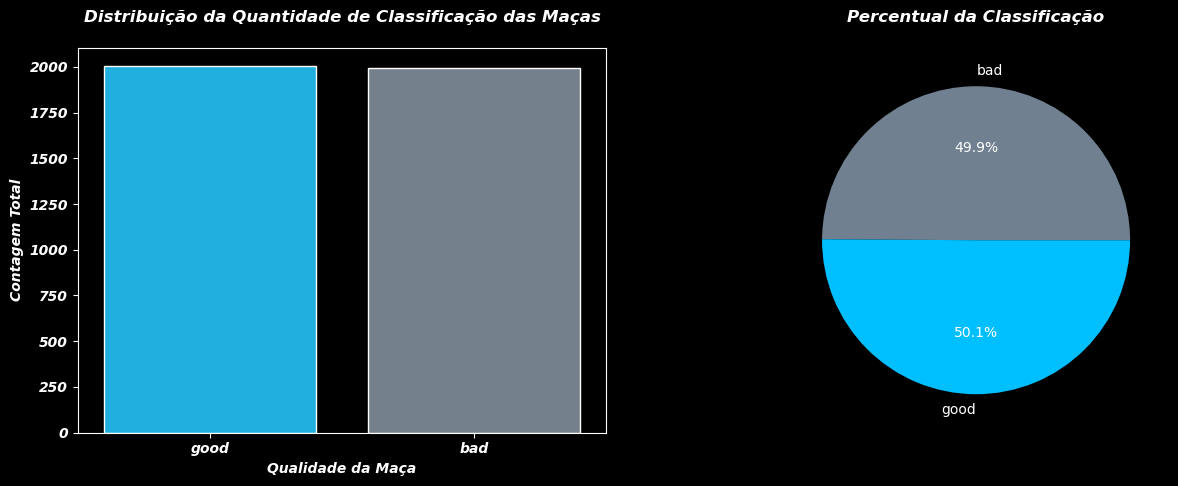

In [105]:
plt.style.use('dark_background')  # Definindo Estilo do Fundo do Gráfico
paleta = ['deepskyblue', 'slategray']  # Definindo Paleta de Cores

plt.figure(figsize=(15,11))
plt.subplot(2, 2, 1)
plt.title('Distribuição da Quantidade de Classificação das Maças\n', fontsize=12, fontweight='bold', style='italic')
sns.countplot(x=data.Quality, data=data, palette=paleta, edgecolor='white')
plt.xlabel('Qualidade da Maça',fontweight='bold', style='italic')
plt.ylabel('Contagem Total',fontweight='bold', style='italic')
plt.xticks(fontweight='bold', style='italic')
plt.yticks(fontweight='bold', style='italic')


plt.subplot(2, 2, 2)
plt.pie(quality_clssifi.values, labels=quality_clssifi.index, autopct='%1.1f%%', colors=['slategray', 'deepskyblue'])
plt.title('Percentual da Classificação\n', fontsize=12, fontweight='bold', style='italic')

In [106]:
data.Quality.value_counts()

good    2004
bad     1996
Name: Quality, dtype: int64

### **Visualizando quais são Valores Únicos da Coluna "Quality"**

In [107]:
data.Quality.unique()

array(['good', 'bad'], dtype=object)

### **Visualizando quais são os Valores Únicos da Coluna "Acidity"**

In [108]:
data.Acidity.unique()

array(['-0.491590483', '-0.722809367', '2.621636473', ..., '-1.334611391',
       '-2.229719806', '1.599796456'], dtype=object)

### **Alterando o Tipo da Coluna "Acidity" para Float (estar em tipo objeto)**

In [109]:
data['Acidity'] = data['Acidity'].astype('float')

### **Visualizando as Distribuições de cada Feature (Recurso/Coluna)**

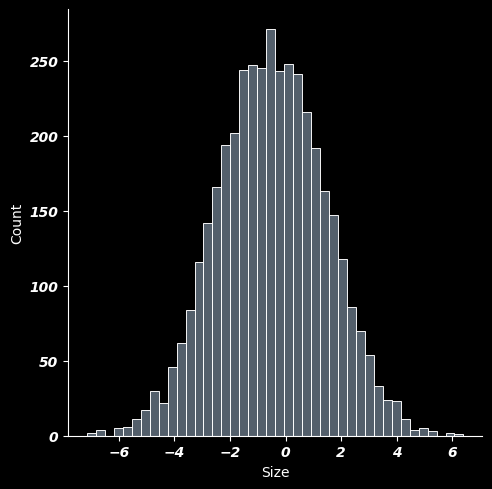

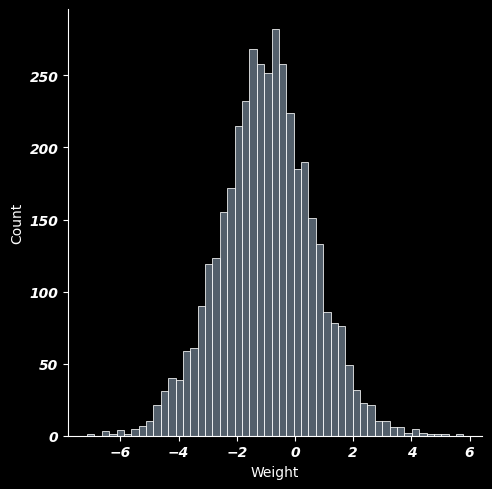

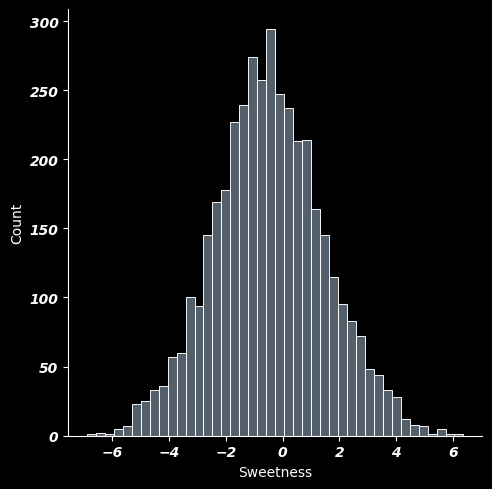

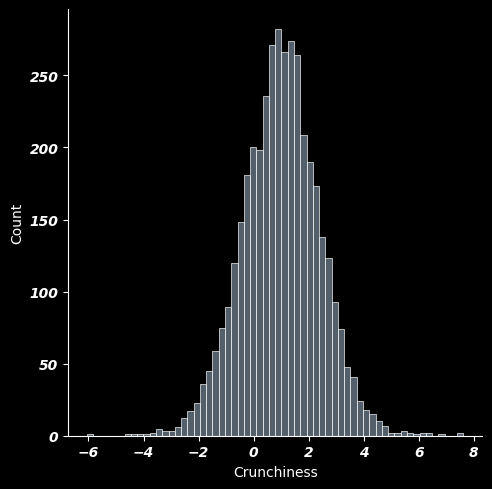

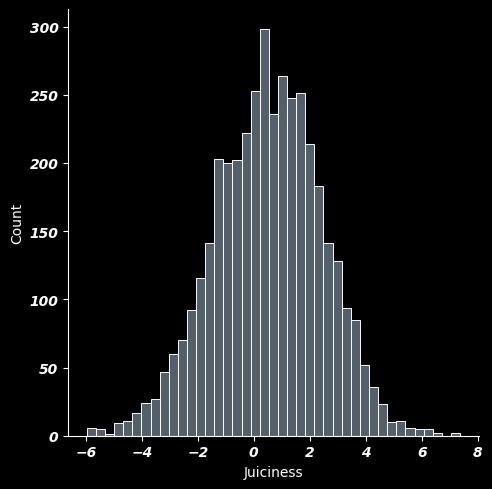

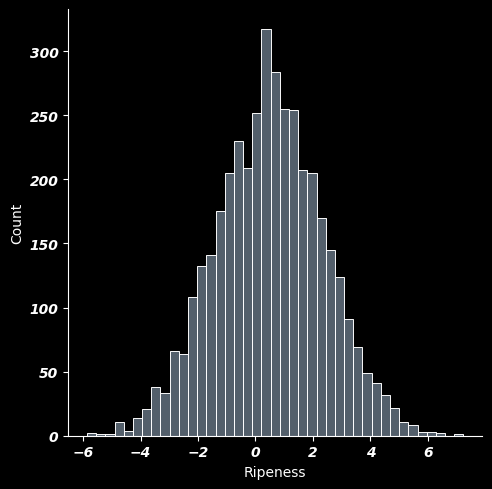

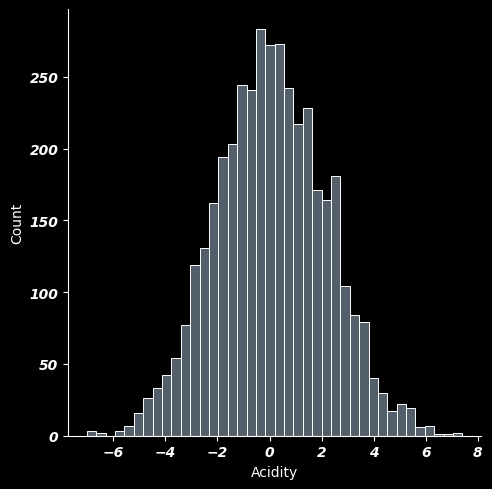

In [110]:
features_columns = ['Size', 'Weight', 'Sweetness', 'Crunchiness', 'Juiciness', 'Ripeness', 'Acidity']

for columns in features_columns:
    sns.displot(x=columns, data=data, color='slategray')
    plt.xticks(fontweight='bold', style='italic')
    plt.yticks(fontweight='bold', style='italic')
    plt.show()

### **Visualizando um Mapa de Calor sobre Relações de Features por Features**

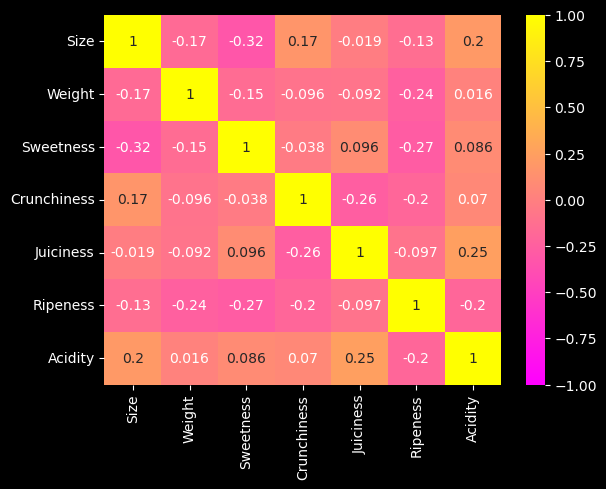

In [111]:
sns.heatmap(data.corr(numeric_only=True), vmin=-1, vmax=1, annot=True, cmap='spring')
plt.show()

# ***Machine Learning***
### **Iniciando Processo de Machine Learning e Algoritmos de Predição**

In [112]:
# Definindo "X" e "y" para Treino e Teste do Modelo
# Verificando com Diferentes Algoritmos para saber qual melhor se encaixa no Projeto de Acordo com sua acúracia e precisão

# X será igual ao Conjunto de Dados Completo menos a Coluna "Quality" que será o Target ou a Coluna que Reprentará a Classificação

X = data.drop('Quality', axis=1).copy()

X.head()

,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity
0,-3.970049,-2.512336,5.346330,-1.012009,1.844900,0.329840,-0.491590
1,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.867530,-0.722809
2,-0.292024,-1.351282,-1.738429,-0.342616,2.838636,-0.038033,2.621636
3,-0.657196,-2.271627,1.324874,-0.097875,3.637970,-3.413761,0.790723
4,1.364217,-1.296612,-0.384658,-0.553006,3.030874,-1.303849,0.501984


In [113]:
# "y" será a Coluna "Quality" que reprersenta o Target (Coluna para Classificação)

y = data.Quality
y[:10]

0    good
1    good
2     bad
3    good
4    good
5     bad
6    good
7    good
8     bad
9     bad
Name: Quality, dtype: object

### **Importando Bibliotecas de Machine Learning e seus Algoritmos de Predição e Aprendizado**

In [114]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

### **Definindo x de treino e teste, y de treino e teste através do train_test_split para o Modelo Classificar Corretamente**

In [115]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=42)

### **Visualizando se o foi Separado Corretamente os Dados de Treino e Dados de Teste**

In [116]:
print(X_train.shape, '\n', X_test.shape, '\n', y_train.shape, '\n', y_test.shape)

(2800, 7) 
 (1200, 7) 
 (2800,) 
 (1200,)


### **Definindo o Algoritmo Random Forest Classifier para Classicar os Dados e Treinando Modelo de X e y**

In [117]:
rfc = RandomForestClassifier()

In [118]:
rfc.fit(X_train, y_train)

RandomForestClassifier()

### **Definindo a Predição dos Dados com o Algoritmo RFC com os Dados X_test e Visualizando 10 de suas Predições**

In [119]:
y_pred = rfc.predict(X_test)
y_pred[:10]

array(['good', 'good', 'good', 'good', 'bad', 'good', 'bad', 'bad',
       'good', 'bad'], dtype=object)

### **Verificando a Acúracia do Algoritmo Random Forest**
### **Verificando Resultados da Matriz de Confusão**
### **Obtendo o Relatório Completo da Classificação, Precisão, Recall, F1-Score e Suporte**

In [120]:
print(f"A Acurácia do Modelo Algoritmo Random Forest é de: {accuracy_score(y_test, y_pred) * 100}%")

A Acurácia do Modelo Algoritmo Random Forest é de: 89.25%


In [121]:
print("A Matriz de Confusão do Algoritmo Random Forest Corresponde a:\n", confusion_matrix(y_test, y_pred))

A Matriz de Confusão do Algoritmo Random Forest Corresponde a:
 [[529  64]
 [ 65 542]]


In [122]:
print("O Relatório de Classificação \n", classification_report(y_test, y_pred))

O Relatório de Classificação 
               precision    recall  f1-score   support

         bad       0.89      0.89      0.89       593
        good       0.89      0.89      0.89       607

    accuracy                           0.89      1200
   macro avg       0.89      0.89      0.89      1200
weighted avg       0.89      0.89      0.89      1200



# ***Rede Neural***
### **Iniciando Processo de Rede Neural com o Tensor Flow e Keras que será Necessária no Desenvolvimento Final do Projeto**

#### **Instalando o Tensor Flow**

In [68]:
%pip install tensorflow

                                              0.0/300.8 MB ? eta -:--:--
                                             0.4/300.8 MB 11.2 MB/s eta 0:00:27
                                             0.9/300.8 MB 10.9 MB/s eta 0:00:28
                                             1.5/300.8 MB 10.5 MB/s eta 0:00:29
                                             2.0/300.8 MB 10.7 MB/s eta 0:00:28
                                             2.6/300.8 MB 11.0 MB/s eta 0:00:28
                                             3.1/300.8 MB 11.1 MB/s eta 0:00:27
                                             3.7/300.8 MB 11.1 MB/s eta 0:00:27
                                             4.2/300.8 MB 11.2 MB/s eta 0:00:27
                                             4.7/300.8 MB 11.6 MB/s eta 0:00:26
                                             5.2/300.8 MB 11.6 MB/s eta 0:00:26
                                             5.2/300.8 MB 11.6 MB/s eta 0:00:26
                                             5.

### **Importando Bibliotecas para a Rede Neural**

In [123]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

### **Pré-Processamento de Dados**

### **Convertendo a Veriável de Destino (Target) para Formato Numérico**

In [124]:
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

In [125]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, random_state=42)

### **Padronizando os Dados, Processo básico Opcional mas muito Recomendado** 

In [126]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

### **Criando o Modelo de Rede Neural**

In [127]:
model = tf.keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    layers.Dense(32, activation='relu'), 
    layers.Dense(1, activation='sigmoid')
])

### **Compilando o Modelo**

In [128]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

### **Treinando o Modelo**

In [129]:
history = model.fit(X_train_scaled, y_train, epochs=10, batch_size=32, validation_data=(X_test_scaled, y_test))

Epoch 1/10
88/88 [==============================] - 1s 2ms/step - loss: 0.5649 - accuracy: 0.7125 - val_loss: 0.4537 - val_accuracy: 0.8200
Epoch 2/10
88/88 [==============================] - 0s 1ms/step - loss: 0.3990 - accuracy: 0.8204 - val_loss: 0.3613 - val_accuracy: 0.8525
Epoch 3/10
88/88 [==============================] - 0s 1ms/step - loss: 0.3397 - accuracy: 0.8457 - val_loss: 0.3226 - val_accuracy: 0.8692
Epoch 4/10
88/88 [==============================] - 0s 1ms/step - loss: 0.3086 - accuracy: 0.8579 - val_loss: 0.3009 - val_accuracy: 0.8842
Epoch 5/10
88/88 [==============================] - 0s 1ms/step - loss: 0.2905 - accuracy: 0.8686 - val_loss: 0.2885 - val_accuracy: 0.8817
Epoch 6/10
88/88 [==============================] - 0s 1ms/step - loss: 0.2775 - accuracy: 0.8764 - val_loss: 0.2822 - val_accuracy: 0.8867
Epoch 7/10
88/88 [==============================] - 0s 1ms/step - loss: 0.2678 - accuracy: 0.8775 - val_loss: 0.2734 - val_accuracy: 0.8917
Epoch 8/10
88/88 [==

### **Visualizando Resultados através de Gráficos de Linhas**

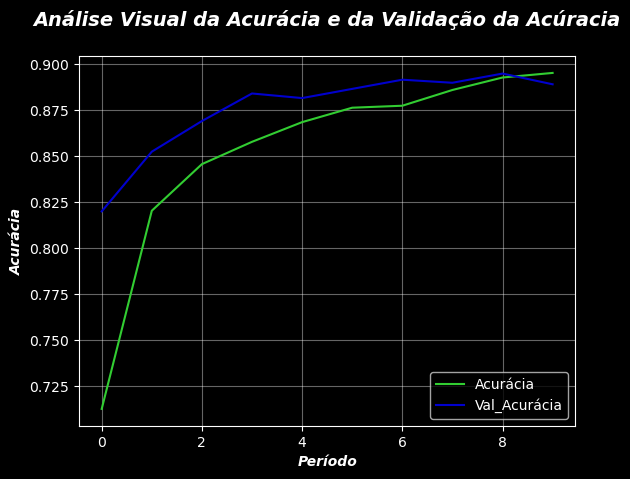

In [130]:
plt.title('Análise Visual da Acurácia e da Validação da Acúracia\n', fontsize=14, fontweight='bold', style='italic')
plt.plot(history.history['accuracy'], color='limegreen')
plt.plot(history.history['val_accuracy'], color='mediumblue')
plt.grid(alpha=0.4)
plt.xlabel('Período', fontweight='bold', style='italic')
plt.ylabel('Acurácia', fontweight='bold', style='italic')
plt.legend(['Acurácia', "Val_Acurácia"])
plt.show()

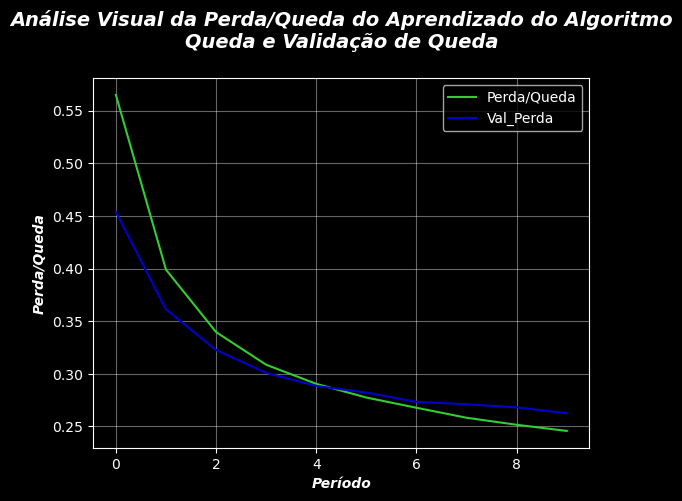

In [131]:
plt.title('Análise Visual da Perda/Queda do Aprendizado do Algoritmo\nQueda e Validação de Queda\n', fontsize=14, fontweight='bold', style='italic')
plt.plot(history.history['loss'], color='limegreen')
plt.plot(history.history['val_loss'], color='mediumblue')
plt.grid(alpha=0.4)
plt.xlabel('Período', fontweight='bold', style='italic')
plt.ylabel('Perda/Queda', fontweight='bold', style='italic')
plt.legend(['Perda/Queda', 'Val_Perda'])
plt.show()

### **Avaliando o Modelo**

In [132]:
accuracy = model.evaluate(X_test_scaled, y_test)[1]
print(f"\nA Acurácia Final Corresponde a: {accuracy * 100}%")

 1/38 [..............................] - ETA: 0s - loss: 0.3726 - accuracy: 0.8438

38/38 [==============================] - 0s 668us/step - loss: 0.2626 - accuracy: 0.8892

A Acurácia Final Corresponde a: 88.91666531562805%


## **Acurácia Final do Modelo é Igual a 88.9%**
# ***Fim***